# Import Libraries

In [1]:
from sympy import init_session
import math
import matplotlib.pyplot as plt

init_session(use_latex = True)

IPython console for SymPy 1.10.1 (Python 3.9.12-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



In [2]:
# Variables
theta_2, theta_3, theta_4 = symbols("theta_2, theta_3, theta_4")
theta_2, theta_3, theta_4

In [3]:
# Parametros
a = 2
b = 7
c = 9
d = 6

a, b, c, d

In [4]:
# GDL Variable de Entrada
theta_2 = math.radians(30)
theta_2

In [5]:
# Funciones
F1 = a*cos(theta_2) + b*cos(theta_3) - c*cos(theta_4) - d
F2 = a*sin(theta_2) + b*sin(theta_3) - c*sin(theta_4)
F1, F2

In [6]:
# Condiciones Iniciales
Ini = Matrix([2, 1])
Ini

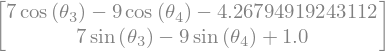

In [7]:
# Vector de funciones
Fun = Matrix([F1,F2])
Fun

In [8]:
# Variables
Var = Matrix ([theta_3,theta_4])
Var

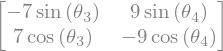

In [9]:
# Jacobiano
J = Fun.jacobian(Var)
J

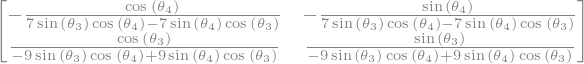

In [10]:
# Jacobiano Invertido
Inv = J.inv()
Inv

In [11]:
# Vector Final
Fin = Matrix([0,0])
Fin

In [12]:
# Tolerancia
tol = 1e-6
tol

In [13]:
# Función Error
def error(Ini,Fin):
    err = sum(abs(Ini-Fin))
    return err

In [14]:
err = error(Ini,Fin)
err

1
1.77127937456060
2
0.786133333901996
3
0.353723676377505
4
0.0454698072991584
5
0.000814333041136761
6
1.28593024228962e-7


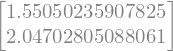

In [15]:
# Newton- Raphson MV
con = 0

while err > tol:
#     plt.plot(con,Ini[0].evalf(),"o", color = "blue")
#     plt.plot(con,Ini[1].evalf(),"v", color = "red")
#     plt.grid()
#     plt.show
    
    Fin = Ini - Inv.subs([(theta_3,Ini[0]),(theta_4,Ini[1])]) * Fun.subs([(theta_3,Ini[0]),(theta_4,Ini[1])])
    err = error(Ini.evalf(),Fin.evalf())
    Ini = Fin.evalf()
    con += 1
    print(con)
    print(err)
Fin

In [16]:
# Respuesta en Grados
round(math.degrees(Fin[0]), 2), round(math.degrees(Fin[1]), 2)